## Convolutional Neural Networks - introduction

Long time before CNN Image processing allows better extracion of the images

<table><tr>
<td> <img src="imgs/edges_detection.jpg" width="800" /> </td>
</tr></table>

- NN were already powerful (NN,CNN start dominating over other ML lagorithms)
- The advancements in Computer Vision with Deep Learning has been constructed and perfected with time, primarily over one particular algorithm — a Convolutional Neural Network. (CNN -  breakthrough in image classification was made by CNN)

<table><tr>
<td> <img src="imgs/CNN.jpeg" width="600" /> </td>
</tr></table>

# If the input is a digit (2D, 3D array of number)
In case of Color image we have 3D

<table><tr>
<td> <img src="imgs/RGB.png" width="600" /> </td>
</tr></table>

## Convolution process
* Image (6x6)
* Filter / Kernel (3x3)
* Pooling (2x2)
* Output (2x2)

A kernel is a small 2D matrix whose contents are based upon the operations to be performed. A kernel maps on the input image by simple matrix multiplication and addition, the output obtained is of lower dimensions and therefore easier to work with.

<table><tr>
<td> <img src="imgs/convolution_process.png" width="1000" /> </td>
</tr></table>

# Just the convolution part (gif)

<table><tr>
<td> <img src="imgs/kernel.gif" width="400" /> </td>
</tr></table>

# But the image has three layers so the kernel works on each layer

<table><tr>
<td> <img src="imgs/kernel3D.gif" width="800" /> </td>
</tr></table>

# Different kernels make different operations on the image

<table><tr>
<td> <img src="imgs/convolution_kernel_example2.png" width="800" /> </td>
</tr></table>

## In tensorflow the Convolution layer is being implemented with the following syntax
`from tensorflow.keras.layers import Conv2D`
`Conv2D(filters=16,  kernel_size=(3, 3), activation='relu', name='conv_1')`

# Max pooling is another operation on the image after the convolution it finds the maximum value in the given `pool size`

<table><tr>
<td> <img src="imgs/pooling.jpg" width="600" /> </td>
</tr></table>

## In tensorflow the Pooling layer is being implemented with the following syntax:
`from tensorflow.keras.layers import MaxPooling2D`
`MaxPooling2D(pool_size=(2, 2), name='pool_1')`

# After the convolution and max pooling is done we flatten the image (or whats left from it)

<table><tr>
<td> <img src="imgs/flattening.png" width="600" /> </td>
</tr></table>

## In tensorflow the Flattening layer is being implemented with the following syntax:
`from tensorflow.keras.layers import Flatten`
`Flatten(name='flatten_layer')`

## The order of the layers in CNN:
* Input layer    
* Convolution layer
* Pooling layer
* Convolution layer
* Pooling layer
* Convolution layer
* Pooling layer
* Flattening layer
* Dense layer
* Dense layer
* output layer ( in case of classification the activation function is: `Sigmoid`)

# CNN with Tensorflow

In [7]:
import tensorflow as tf
print(tf.__version__)

2.5.0


#### Load and inspect CIFAR-10 dataset
The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [8]:
# Import the CIFAR-10 dataset and rescale the pixel values

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Use smaller subset -- speeds things up
#X_train = X_train[:10000]
#y_train = y_train[:10000]
#X_test = X_test[:1000]

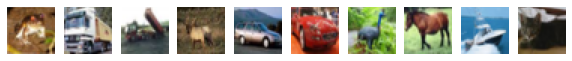

In [9]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_train[0].shape

(32, 32, 3)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [14]:
def get_model(input_shape):
    model = Sequential([InputLayer(input_shape=input_shape),
                        Conv2D(filters=16,  kernel_size=(3, 3), activation='relu', name='conv_1'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_1'),
                        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_2'),
                        Flatten(name='flatten'),
                        Dense(units=32, activation='relu', name='dense_1'),
                        Dense(units=10, activation='softmax', name='dense_2')])
    
    return model

In [15]:
def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [16]:
# Create an instance of the model and show model summary
model=get_model(X_train[0].shape)
compile_model(model)
#model = get_new_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 15, 15, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 13, 13, 8)         1160      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 6, 6, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                9248      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3

In [18]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.112


In [19]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch
epochs=10
history=model.fit(X_train,y_train,epochs=epochs,validation_split=0.1,verbose=1)

Epoch 1/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6925 - accuracy: 0.3830 - val_loss: 1.4580 - val_accuracy: 0.4690
Epoch 2/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3928 - accuracy: 0.5016 - val_loss: 1.3115 - val_accuracy: 0.5350
Epoch 3/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2951 - accuracy: 0.5396 - val_loss: 1.2480 - val_accuracy: 0.5558
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.2409 - accuracy: 0.5616 - val_loss: 1.2204 - val_accuracy: 0.5732
Epoch 5/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2054 - accuracy: 0.5746 - val_loss: 1.2337 - val_accuracy: 0.5598
Epoch 6/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1769 - accuracy: 0.5835 - val_loss: 1.2096 - val_accuracy: 0.5672
Epoch 7/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.1556 - accuracy: 0.5915 - val_loss: 1.1819 -

In [20]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.607


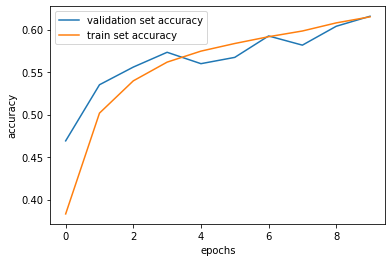

In [21]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, history.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, history.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()